
<a id='solow'></a>

# The Solow-Swan Growth Model

In this lecture we review a famous model due
to [Robert Solow (1925–2014)](https://en.wikipedia.org/wiki/Robert_Solow) and [Trevor Swan (1918–1989)](https://en.wikipedia.org/wiki/Trevor_Swan).

The model is used to study growth over the long run.

Although the model is simple, it contains some interesting lessons.

We will use the following imports

In [12]:
import matplotlib.pyplot as plt
import numpy as np

## The model

In a Solow–Swan economy, agents save a fixed fraction of their current
incomes.

Savings sustain or increase the stock of capital.

Capital is combined with labor to produce output, which in turn is paid out to
workers and owners of capital.

To keep things simple, we ignore population and productivity growth.

For each integer $ t \geq 0 $, output $ Y_t $ in period $ t $ is given by $ Y_t =
F(K_t, L_t) $, where $ K_t $ is capital, $ L_t $ is labor and $ F $ is an aggregate
production function.

The function $ F $ is assumed to be nonnegative and
**homogeneous of degree one**, meaning
that

$$
F(\lambda K, \lambda L) = \lambda F(K, L)
    \quad \text{for all } \lambda \geq 0
$$

Production functions with this property include

- the **Cobb-Douglas** function $ F(K, L) = A K^{\alpha}
  L^{1-\alpha} $ with $ 0 \leq \alpha \leq 1 $ and  
- the **CES** function $ F(K, L) = \left\{ a K^\rho + b L^\rho \right\}^{1/\rho} $
  with $ a, b, \rho > 0 $.  


We assume a closed economy, so domestic investment equals aggregate domestic
saving.

The saving rate is a constant $ s $ satisfying $ 0 \leq s \leq 1 $, so that aggregate
investment and saving both equal  $ s Y_t $.

Capital depreciates: without replenishing through investment, one unit of capital today
becomes $ 1-\delta $ units tomorrow.

Thus,

$$
K_{t+1} = s F(K_t, L_t) + (1 - \delta) K_t
$$

Without population growth, $ L_t $ equals some constant $ L $.

Setting $ k_t := K_t / L $ and using homogeneity of degree one now yields

$$
k_{t+1}
    = s \frac{F(K_t, L)}{L} + (1 - \delta) k_t
    = s F(k_t, 1) + (1 - \delta) k_t
$$

With  $ f(k) := F(k, 1) $, the final expression for capital dynamics is


<a id='equation-solow'></a>
$$
k_{t+1} = g(k_t)
    \text{ where } g(k) := s f(k) + (1 - \delta) k \tag{20.1}
$$

Our aim is to learn about the evolution of $ k_t $ over time,
given an exogenous initial capital stock  $ k_0 $.

## A graphical perspective

To understand the dynamics of the sequence $ (k_t)_{t \geq 0} $ we use a 45
degree diagram.

To do so, we first
need to specify the functional form for $ f $ and assign values to the parameters.

We choose the Cobb–Douglas specification $ f(k) = A k^\alpha $ and set $ A=2.0 $,
$ \alpha=0.3 $, $ s=0.3 $ and $ \delta=0.4 $.

The function $ g $ from [(20.1)](#equation-solow) is then plotted, along with the 45
degree line.

Let’s define the constants.

In [13]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
x0 = 0.25
xmin, xmax = 0, 3

Now, we define the function $ g $

In [14]:
def g(A, s, alpha, delta, k):
    return A * s * k**alpha + (1 - delta) * k

Let’s plot the 45 degree diagram of $ g $

In [15]:
def plot45(kstar=None):
    xgrid = np.linspace(xmin, xmax, 12000)

    fig, ax = plt.subplots()

    ax.set_xlim(xmin, xmax)

    g_values = g(A, s, alpha, delta, xgrid)

    ymin, ymax = np.min(g_values), np.max(g_values)
    ax.set_ylim(ymin, ymax)

    lb = r'$g(k) = sAk^{\alpha} + (1 - \delta)k$'
    ax.plot(xgrid, g_values,  lw=2, alpha=0.6, label=lb)
    ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='45')

    if kstar:
        fps = (kstar,)

        ax.plot(fps, fps, 'go', ms=10, alpha=0.6)

        ax.annotate(r'$k^* = (sA / \delta)^{(1/(1-\alpha))}$',
                 xy=(kstar, kstar),
                 xycoords='data',
                 xytext=(-40, -60),
                 textcoords='offset points',
                 fontsize=14,
                 arrowprops=dict(arrowstyle="->"))

    ax.legend(loc='upper left', frameon=False, fontsize=12)

    ax.set_xticks((0, 1, 2, 3))
    ax.set_yticks((0, 1, 2, 3))

    ax.set_xlabel('$k_t$', fontsize=12)
    ax.set_ylabel('$k_{t+1}$', fontsize=12)

    plt.show()

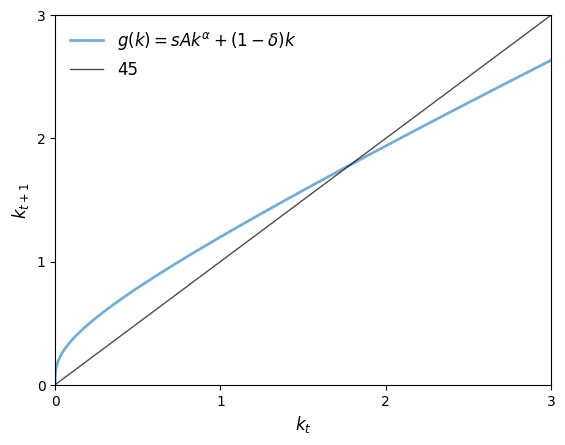

In [16]:
plot45()

Suppose, at some $ k_t $, the value $ g(k_t) $ lies strictly above the 45 degree line.

Then we have $ k_{t+1} = g(k_t) > k_t $ and capital per worker rises.

If $ g(k_t) < k_t $ then capital per worker falls.

If $ g(k_t) = k_t $, then we are at a **steady state** and $ k_t $ remains constant.

(A steady state of the model is a [fixed point](https://en.wikipedia.org/wiki/Fixed_point_%28mathematics%29) of the mapping $ g $.)

From the shape of the function $ g $ in the figure, we see that
there is a unique steady state in $ (0, \infty) $.

It solves $ k = s Ak^{\alpha} + (1-\delta)k $ and hence is given by


<a id='equation-kstarss'></a>
$$
k^* := \left( \frac{s A}{\delta} \right)^{1/(1 - \alpha)} \tag{20.2}
$$

If initial capital is below $ k^* $, then capital increases over time.

If initial capital is above this level, then the reverse is true.

Let’s plot the 45 degree diagram to show the $ k^* $ in the plot

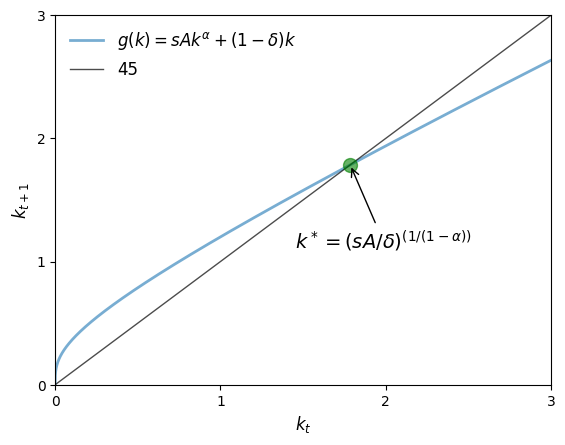

In [17]:
kstar = ((s * A) / delta)**(1/(1 - alpha))
plot45(kstar)

From our graphical analysis, it appears that $ (k_t) $ converges to $ k^* $, regardless of initial capital
$ k_0 $.

This is a form of global stability.

The next figure shows three time paths for capital, from
three distinct initial conditions, under the parameterization listed above.

At this parameterization, $ k^* \approx 1.78 $.

Let’s define the constants and three distinct initial conditions

In [18]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
x0 = np.array([.25, 1.25, 3.25])

ts_length = 20
xmin, xmax = 0, ts_length
ymin, ymax = 0, 3.5

In [19]:
def simulate_ts(x0_values, ts_length):

    k_star = (s * A / delta)**(1/(1-alpha))
    fig, ax = plt.subplots(figsize=[11, 5])
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    ts = np.zeros(ts_length)

    # simulate and plot time series
    for x_init in x0_values:
        ts[0] = x_init
        for t in range(1, ts_length):
            ts[t] = g(A, s, alpha, delta, ts[t-1])
        ax.plot(np.arange(ts_length), ts, '-o', ms=4, alpha=0.6,
                label=r'$k_0=%g$' %x_init)
    ax.plot(np.arange(ts_length), np.full(ts_length,k_star),
            alpha=0.6, color='red', label=r'$k^*$')
    ax.legend(fontsize=10)

    ax.set_xlabel(r'$t$', fontsize=14)
    ax.set_ylabel(r'$k_t$', fontsize=14)

    plt.show()

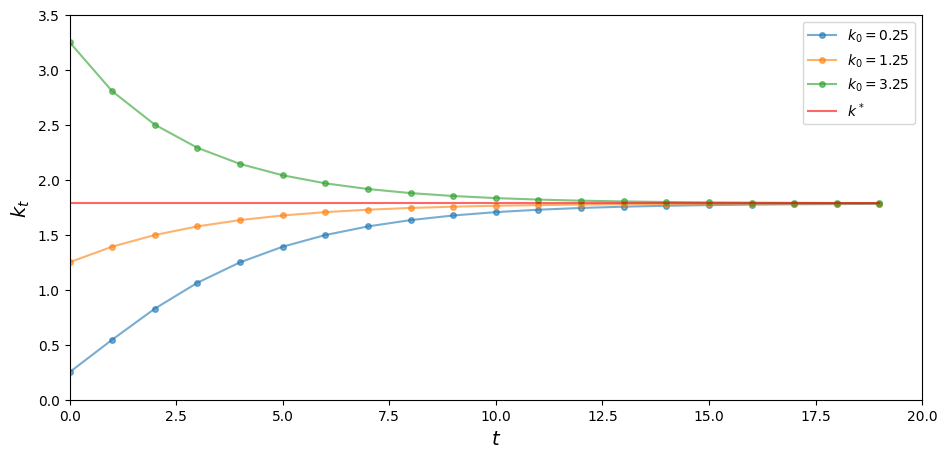

In [20]:
simulate_ts(x0, ts_length)

As expected, the time paths in the figure both converge to this value.

## Growth in continuous time

In this section we investigate a continuous time version of the Solow–Swan
growth model.

We will see how the smoothing provided by continuous time can
simplify analysis.

Recall  that the discrete time dynamics for capital are
given by $ k_{t+1} = s f(k_t) + (1 - \delta) k_t $.

A simple rearrangement gives the rate of change per unit of time:

$$
\Delta k_t = s f(k_t) - \delta k_t
    \quad \text{where} \quad
    \Delta k_t := k_{t+1}  - k_t
$$

Taking the time step to zero gives the continuous time limit


<a id='equation-solowc'></a>
$$
k'_t = s f(k_t) - \delta k_t
    \qquad \text{with} \qquad
    k'_t := \frac{d}{dt} k_t \tag{20.3}
$$

Our aim is to learn about the evolution of $ k_t $ over time,
given initial stock  $ k_0 $.

A **steady state** for [(20.3)](#equation-solowc) is a value $ k^* $
at which capital is unchanging, meaning $ k'_t = 0 $ or, equivalently,
$ s f(k^*) = \delta k^* $.

We assume
$ f(k) = Ak^\alpha $, so $ k^* $ solves
$ s A k^\alpha = \delta k $.

The solution is the same as the discrete time case—see [(20.2)](#equation-kstarss).

The dynamics are represented in
the next figure, maintaining the parameterization we used
above.

Writing $ k'_t = g(k_t) $ with $ g(k) =
s Ak^\alpha - \delta k $, values of $ k $ with $ g(k) > 0 $ imply that $ k'_t > 0 $, so
capital is increasing.

When $ g(k) < 0 $, the opposite occurs.  Once again, high marginal returns to
savings at low levels of capital combined with low rates of return at high
levels of capital combine to yield global stability.

To see this in a figure, let’s define the constants

In [21]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4

Next we define the function $ g $ for growth in continuous time

In [22]:
def g_con(A, s, alpha, delta, k):
    return A * s * k**alpha - delta * k

In [23]:
def plot_gcon(kstar=None):

    k_grid = np.linspace(0, 2.8, 10000)

    fig, ax = plt.subplots(figsize=[11, 5])
    ax.plot(k_grid, g_con(A, s, alpha, delta, k_grid), label='$g(k)$')
    ax.plot(k_grid, 0 * k_grid, label="$k'=0$")

    if kstar:
        fps = (kstar,)

        ax.plot(fps, 0, 'go', ms=10, alpha=0.6)


        ax.annotate(r'$k^* = (sA / \delta)^{(1/(1-\alpha))}$',
                 xy=(kstar, 0),
                 xycoords='data',
                 xytext=(0, 60),
                 textcoords='offset points',
                 fontsize=12,
                 arrowprops=dict(arrowstyle="->"))

    ax.legend(loc='lower left', fontsize=12)

    ax.set_xlabel("$k$",fontsize=10)
    ax.set_ylabel("$k'$", fontsize=10)

    ax.set_xticks((0, 1, 2, 3))
    ax.set_yticks((-0.3, 0, 0.3))

    plt.show()

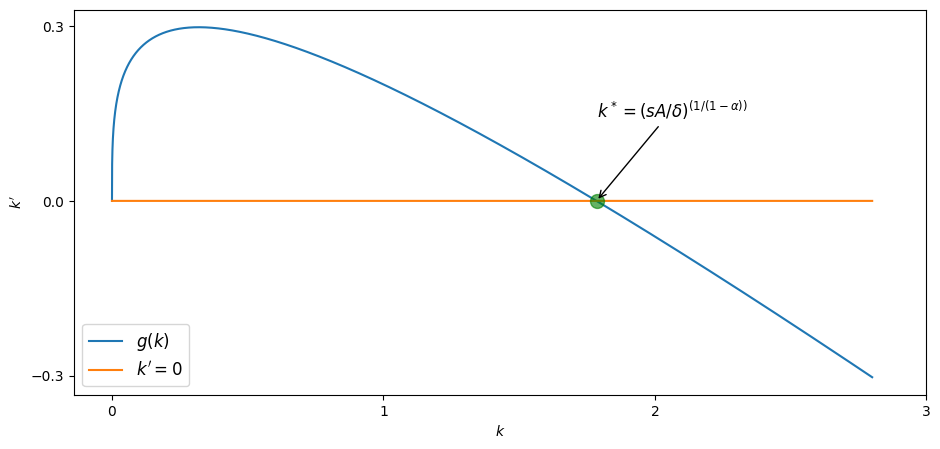

In [24]:
kstar = ((s * A) / delta)**(1/(1 - alpha))
plot_gcon(kstar)

This shows global stability heuristically for a fixed parameterization, but
how would we show the same thing formally for a continuum of plausible parameters?

In the discrete time case, a neat expression for $ k_t $ is hard to obtain.

In continuous time the process is easier: we can obtain a relatively simple
expression for $ k_t $ that specifies the entire path.

The first step is
to set $ x_t := k_t^{1-\alpha} $, so that $ x'_t = (1-\alpha) k_t^{-\alpha}
k'_t $.

Substituting into $ k'_t = sAk_t^\alpha - \delta k_t $ leads to the
linear differential equation


<a id='equation-xsolow'></a>
$$
x'_t = (1-\alpha) (sA - \delta x_t) \tag{20.4}
$$

This equation has the exact solution

$$
x_t
    = \left(
        k_0^{1-\alpha} - \frac{sA}{\delta}
      \right)
      \mathrm{e}^{-\delta (1-\alpha) t} +
    \frac{sA}{\delta}
$$

(You can confirm that this function $ x_t $ satisfies [(20.4)](#equation-xsolow) by
differentiating it with respect to $ t $.)

Converting back to $ k_t $ yields


<a id='equation-ssivs'></a>
$$
k_t
    =
    \left[
        \left(
        k_0^{1-\alpha} - \frac{sA}{\delta}
      \right)
      \mathrm{e}^{-\delta (1-\alpha) t} +
    \frac{sA}{\delta}
    \right]^{1/(1-\alpha)} \tag{20.5}
$$

Since $ \delta > 0 $ and $ \alpha \in (0, 1) $, we see immediately that $ k_t \to
k^* $ as $ t \to \infty $ independent of $ k_0 $.

Thus, global stability holds.

## Exercises

## Exercise 20.1

Plot per capita consumption $ c $ at the steady state, as a function of the savings rate $ s $, where $ 0 \leq s \leq 1 $.

Use the Cobb–Douglas specification $ f(k) = A k^\alpha $.

Set $ A=2.0, \alpha=0.3, $ and $ \delta=0.5 $

Also, find the approximate value of $ s $ that maximizes the $ c^*(s) $ and show it in the plot.

## Solution to[ Exercise 20.1](https://intro.quantecon.org/#solow_ex1)

Steady state consumption at savings rate $ s $ is given by

$$
c^*(s) = (1-s)f(k^*) = (1-s)A(k^*)^\alpha
$$

In [25]:
A = 2.0
alpha = 0.3
delta = 0.5

In [26]:
s_grid = np.linspace(0, 1, 1000)
k_star = ((s_grid * A) / delta)**(1/(1 - alpha))
c_star = (1 - s_grid) * A * k_star ** alpha

Let’s find the value of $ s $ that maximizes $ c^* $ using [scipy.optimize.minimize_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar).
We will use $ -c^*(s) $ since `minimize_scalar` finds the minimum value.

In [27]:
from scipy.optimize import minimize_scalar

In [28]:
def calc_c_star(s):
    k = ((s * A) / delta)**(1/(1 - alpha))
    return - (1 - s) * A * k ** alpha

In [29]:
return_values = minimize_scalar(calc_c_star, bounds=(0, 1))
s_star_max = return_values.x
c_star_max = -return_values.fun
print(f"Function is maximized at s = {round(s_star_max, 4)}")

Function is maximized at s = 0.3


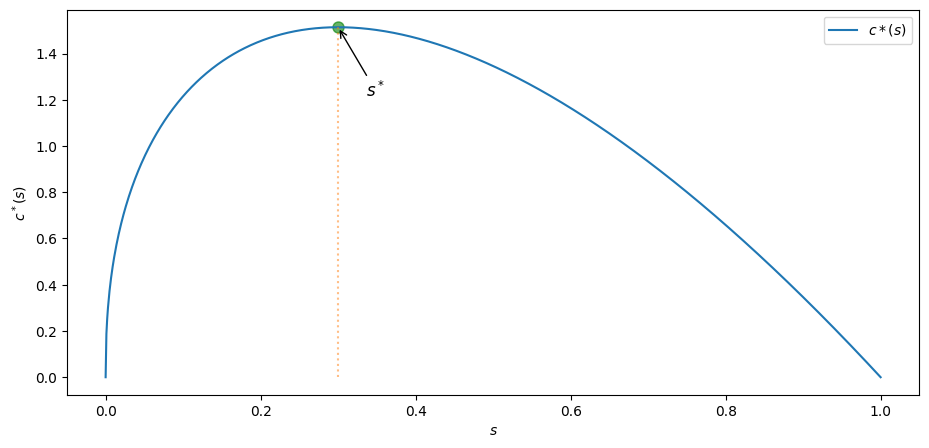

In [30]:
x_s_max = np.array([s_star_max, s_star_max])
y_s_max = np.array([0, c_star_max])

fig, ax = plt.subplots(figsize=[11, 5])

fps = (c_star_max,)

# Highlight the maximum point with a marker
ax.plot((s_star_max, ), (c_star_max,), 'go', ms=8, alpha=0.6)

ax.annotate(r'$s^*$',
         xy=(s_star_max, c_star_max),
         xycoords='data',
         xytext=(20, -50),
         textcoords='offset points',
         fontsize=12,
         arrowprops=dict(arrowstyle="->"))
ax.plot(s_grid, c_star, label=r'$c*(s)$')
ax.plot(x_s_max, y_s_max, alpha=0.5, ls='dotted')
ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$c^*(s)$')
ax.legend()

plt.show()

One can also try to solve this mathematically by differentiating $ c^*(s) $ and solve for $ \frac{d}{ds}c^*(s)=0 $ using [sympy](https://www.sympy.org/en/index.html).

In [31]:
from sympy import solve, Symbol

ModuleNotFoundError: No module named 'sympy'

In [ ]:
s_symbol = Symbol('s', real=True)
k = ((s_symbol * A) / delta)**(1/(1 - alpha))
c = (1 - s_symbol) * A * k ** alpha

Let’s differentiate $ c $ and solve using [sympy.solve](https://docs.sympy.org/latest/modules/solvers/solvers.html#sympy.solvers.solvers.solve)

In [ ]:
# Solve using sympy
s_star = solve(c.diff())[0]
print(f"s_star = {s_star}")

Incidentally, the rate of savings which maximizes steady state level of per capita consumption is called the [Golden Rule savings rate](https://en.wikipedia.org/wiki/Golden_Rule_savings_rate).

## Exercise 20.2

**Stochastic Productivity**

To bring the Solow–Swan model closer to data, we need to think about handling
random fluctuations in aggregate quantities.

Among other things, this will
eliminate the unrealistic prediction that per-capita output $ y_t = A
k^\alpha_t $ converges to a constant $ y^* := A (k^*)^\alpha $.

We shift to discrete time for the following discussion.

One approach is to replace constant productivity with some
stochastic sequence $ (A_t)_{t \geq 1} $.

Dynamics are now


<a id='equation-solowran'></a>
$$
k_{t+1} = s A_{t+1} f(k_t) + (1 - \delta) k_t \tag{20.6}
$$

We suppose $ f $ is Cobb–Douglas and $ (A_t) $ is IID and lognormal.

Now the long run convergence obtained in the deterministic case breaks
down, since the system is hit with new shocks at each point in time.

Consider $ A=2.0, s=0.6, \alpha=0.3, $ and $ \delta=0.5 $

Generate and plot the time series $ k_t $.

## Solution to[ Exercise 20.2](https://intro.quantecon.org/#solow_ex2)

Let’s define the constants for lognormal distribution and initial values used for simulation

In [32]:
# Define the constants
sig = 0.2
mu = np.log(2) - sig**2 / 2
A = 2.0
s = 0.6
alpha = 0.3
delta = 0.5
x0 = [.25, 3.25] # list of initial values used for simulation

Let’s define the function *k_next* to find the next value of $ k $

In [33]:
def lgnorm():
    return np.exp(mu + sig * np.random.randn())

def k_next(s, alpha, delta, k):
    return lgnorm() * s * k**alpha + (1 - delta) * k

In [34]:
def ts_plot(x_values, ts_length):
    fig, ax = plt.subplots(figsize=[11, 5])
    ts = np.zeros(ts_length)

    # simulate and plot time series
    for x_init in x_values:
        ts[0] = x_init
        for t in range(1, ts_length):
            ts[t] = k_next(s, alpha, delta, ts[t-1])
        ax.plot(np.arange(ts_length), ts, '-o', ms=4,
                alpha=0.6, label=r'$k_0=%g$' %x_init)

    ax.legend(loc='best', fontsize=10)

    ax.set_xlabel(r'$t$', fontsize=12)
    ax.set_ylabel(r'$k_t$', fontsize=12)


    plt.show()

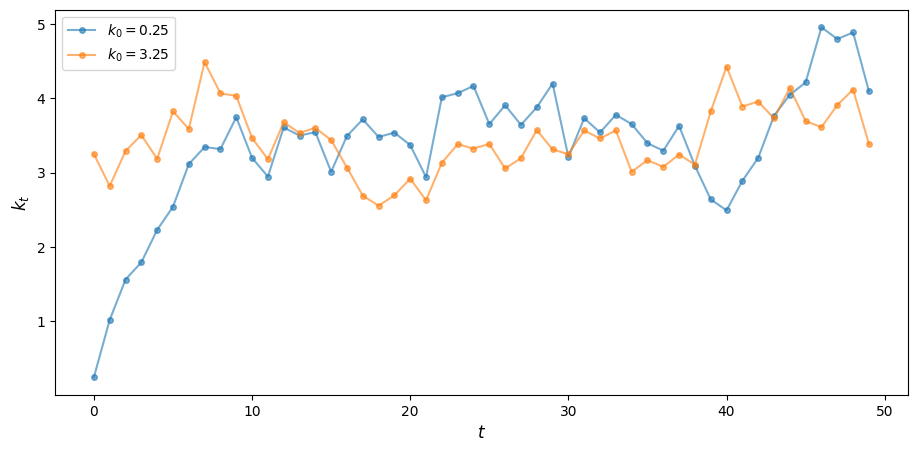

In [35]:
ts_plot(x0, 50)